In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv('./KNNAlgorithmDataset.csv')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
X = dataset.iloc[:, 0:4].values
X

array([[842302, 'M', 17.99, 10.38],
       [842517, 'M', 20.57, 17.77],
       [84300903, 'M', 19.69, 21.25],
       ...,
       [926954, 'M', 16.6, 28.08],
       [927241, 'M', 20.6, 29.33],
       [92751, 'B', 7.76, 24.54]], dtype=object)

In [5]:
dataset1 = pd.DataFrame(X)
dataset1.columns =['id',
       'diagnosis',
        'radius_mean',
        'texture_mean']
display(dataset1)


,id,diagnosis,radius_mean,texture_mean
0,842302,M,17.99,10.38
1,842517,M,20.57,17.77
2,84300903,M,19.69,21.25
3,84348301,M,11.42,20.38
4,84358402,M,20.29,14.34
...,...,...,...,...
564,926424,M,21.56,22.39
565,926682,M,20.13,28.25
566,926954,M,16.6,28.08
567,927241,M,20.6,29.33


In [6]:
import matplotlib.pyplot as plt


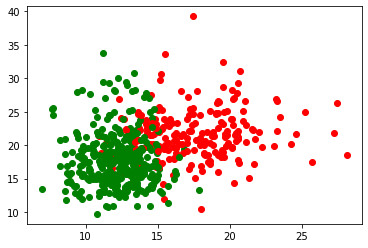

In [7]:
colors = {'M':'r', 'B':'g'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(dataset1['id'])):
    ax.scatter(dataset1['radius_mean'][i], dataset1['texture_mean'][i],color=colors[dataset1['diagnosis'][i]])

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(dataset1['diagnosis'])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [9]:
x = dataset1.iloc[:,2:4].values
x[:, 0]

array([17.99, 20.57, 19.69, 11.42, 20.29, 12.45, 18.25, 13.71, 13.0,
       12.46, 16.02, 15.78, 19.17, 15.85, 13.73, 14.54, 14.68, 16.13,
       19.81, 13.54, 13.08, 9.504, 15.34, 21.16, 16.65, 17.14, 14.58,
       18.61, 15.3, 17.57, 18.63, 11.84, 17.02, 19.27, 16.13, 16.74,
       14.25, 13.03, 14.99, 13.48, 13.44, 10.95, 19.07, 13.28, 13.17,
       18.65, 8.196, 13.17, 12.05, 13.49, 11.76, 13.64, 11.94, 18.22,
       15.1, 11.52, 19.21, 14.71, 13.05, 8.618, 10.17, 8.598, 14.25,
       9.173, 12.68, 14.78, 9.465, 11.31, 9.029, 12.78, 18.94, 8.888,
       17.2, 13.8, 12.31, 16.07, 13.53, 18.05, 20.18, 12.86, 11.45, 13.34,
       25.22, 19.1, 12.0, 18.46, 14.48, 19.02, 12.36, 14.64, 14.62, 15.37,
       13.27, 13.45, 15.06, 20.26, 12.18, 9.787, 11.6, 14.42, 13.61,
       6.981, 12.18, 9.876, 10.49, 13.11, 11.64, 12.36, 22.27, 11.34,
       9.777, 12.63, 14.26, 10.51, 8.726, 11.93, 8.95, 14.87, 15.78,
       17.95, 11.41, 18.66, 24.25, 14.5, 13.37, 13.85, 13.61, 19.0, 15.1,
       19.7

In [10]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [11]:
%pip install plotly==5.11.0

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: plotly==5.11.0 in c:\users\diyak\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages (5.11.0)


In [12]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [13]:

import streamlit as st
import plotly.express as px
import plotly.graph_objects as go

In [41]:
#KNN
def min_max_normalize(lst):
    minimum = min(lst)
    maximum = max(lst)
    normalized = [(val - minimum)/(maximum - minimum) for val in 
    lst]                               
    return normalized

def distance(element1 , element2):
    x_distance = (element1[0] - element2[0])**2
    y_distance = (element1[1] - element2[1])**2
    return (x_distance + y_distance)**0.5

def get_label(neighbours, y):
    zero_count , one_count = 0,0
    for element in neighbours:
      if y[element[1]] == 0:
         zero_count +=1
      elif y[element[1]] == 1:
         one_count +=1
    if zero_count == one_count:
         return y[neighbours[0][1]]
    return 1 if one_count > zero_count else 0
    
def find_nearest(x , y , input , k):
    distances = []
    for id,element in enumerate(x):
        distances.append([distance(input , element),id])
    distances = sorted(distances)
    predicted_label = get_label(distances[0:k] , y)
    return predicted_label, distances[0:k]
input = (0.5,0.6)

x[:,0] = min_max_normalize(x[:,0])
x[:,1] = min_max_normalize(x[:,1])




In [15]:
df = pd.DataFrame(x, columns=['radius_mean', 'texture_mean'])
df['labels'] = y
df

,radius_mean,texture_mean,labels
0,0.521037,0.022658,1
1,0.643144,0.272574,1
2,0.601496,0.39026,1
3,0.21009,0.360839,1
4,0.629893,0.156578,1
...,...,...,...
564,0.69,0.428813,1
565,0.62232,0.626987,1
566,0.455251,0.621238,1
567,0.644564,0.66351,1


In [22]:
fig = px.scatter(df, x = 'radius_mean' , y='texture_mean', symbol='labels',symbol_map={'0':'square-dot' , '1':'circle'})
fig.add_trace(
    go.Scatter(x= [input[0]], y=[input[1]], name = "Point to Classify", )
)
st.plotly_chart(fig)


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

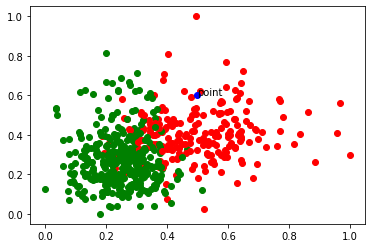

In [34]:
colors = {1:'r', 0:'g'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(df['labels'])):
    ax.scatter(df['radius_mean'][i], df['texture_mean'][i],color=colors[df['labels'][i]])
ax.annotate('point',(input[0],input[1])) 
plt.scatter(input[0],input[1],color='blue')   


In [60]:
predicted_label , nearest_neighbours= find_nearest(x ,y , input ,5)


In [61]:
predicted_label
nearest_neighbours

[[0.02181180787194561, 446],
 [0.024283451735299905, 460],
 [0.049532895893597516, 566],
 [0.0642588714676959, 213],
 [0.0699443950187331, 441]]